# Analyzing João Lorenços twiiter data

In [38]:
# Libs
import tweepy           
import pandas as pd     
import numpy as np  
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
# Acessing twitters api
from credentials import *

# Api configuration:
def twitter_config():
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    api = tweepy.API(auth)
    return api

In [40]:
# Extracting the info:
extractor = twitter_config()

# Creating a list of tweets:
tweets = extractor.user_timeline(screen_name="jlprdeangola", count=200)
print("Tweets Obtidos: {}.\n".format(len(tweets)))

# Lets see if it works:
print("Os primeiros 10 tweets:\n")
for tweet in tweets[:10]:
    print(tweet.text)
    print()

Tweets Obtidos: 46.

Os primeiros 10 tweets:

Vamos dançar o CARNAVAL. É folia! Com paz, alegria, todos irmanados, enchamos as ruas com canções e danças que exal… https://t.co/GRvtsjZCet

Angolanas e angolanos,

Hoje, 2 de Março, dia em que se celebra, mais uma vez, a entrega da MULHER ANGOLANA na luta… https://t.co/RHjWYPZv2f

Considero o governo electrónico um importante factor para o desenvolvimento do país, por isso, anuncio o lançamento… https://t.co/qt1M74JF1s

Na passagem de mais um ano, reflictamos sobre a necessidade de, em 2019, cada um de nós ser parte fundamental na co… https://t.co/whb71s6o96

Na próxima sexta-feira, recebo, aqui Palácio, jornalistas de órgãos nacionais e estrangeiros para, numa entrevista… https://t.co/A77yqZKjkg

A sociedade civil constitui um interlocutor incontornável do Executivo na concepção e execução das políticas públic… https://t.co/PvarYk1Hun

Ao celebrarmos os 43 anos da independência, cada angolano deve reflectir sobre a necessidade de honrar 

In [41]:
# Creating a dataframe to store the data:
dataJoao = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# Lets view the head. PS: It has to be the same info as the one on top...
display(dataJoao.head(10))

,Tweets
0,"Vamos dançar o CARNAVAL. É folia! Com paz, ale..."
1,"Angolanas e angolanos,\n\nHoje, 2 de Março, di..."
2,Considero o governo electrónico um importante ...
3,"Na passagem de mais um ano, reflictamos sobre ..."
4,"Na próxima sexta-feira, recebo, aqui Palácio, ..."
5,A sociedade civil constitui um interlocutor in...
6,"Ao celebrarmos os 43 anos da independência, ca..."
7,Apelamos à União Europeia a estabelecer com os...
8,Com vista a facilitar os negócios e dinamizar ...
9,Nesta data de grande significado para o Povo a...


In [42]:
#Lets see the info for the dataframe.
dataJoao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 1 columns):
Tweets    46 non-null object
dtypes: object(1)
memory usage: 448.0+ bytes


In [43]:
# Lets see the methods:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [44]:
#Lets save the relevant data
dataJoao['len'] = np.array([len(tweet.text) for tweet in tweets])
dataJoao['ID']  = np.array([tweet.id for tweet in tweets])
dataJoao['CreateAt'] = np.array([tweet.created_at for tweet in tweets])
dataJoao['Source'] = np.array([tweet.source for tweet in tweets])
dataJoao['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
dataJoao['RTs']    = np.array([tweet.retweet_count for tweet in tweets])
dataJoao['Favored'] = np.array([tweet.favorited for tweet in tweets])

In [45]:
# Lets see the new DataFrame:
display(dataJoao.head(10))

,Tweets,len,ID,CreateAt,Source,Likes,RTs,Favored
0,"Vamos dançar o CARNAVAL. É folia! Com paz, ale...",140,1102526674577444864,2019-03-04 11:10:17,Instagram,361,35,False
1,"Angolanas e angolanos,\n\nHoje, 2 de Março, di...",140,1101618311664558080,2019-03-01 23:00:47,Instagram,520,64,False
2,Considero o governo electrónico um importante ...,140,1087945728935235584,2019-01-23 05:30:49,Twitter for Android,816,222,False
3,"Na passagem de mais um ano, reflictamos sobre ...",140,1079604342867542016,2018-12-31 05:05:08,Twitter for Android,1471,385,False
4,"Na próxima sexta-feira, recebo, aqui Palácio, ...",139,1075064949641236480,2018-12-18 16:27:12,Twitter for Android,1364,227,False
5,A sociedade civil constitui um interlocutor in...,140,1069694991570821123,2018-12-03 20:48:54,Twitter for Android,908,124,False
6,"Ao celebrarmos os 43 anos da independência, ca...",139,1061852378863931392,2018-11-12 05:25:10,Twitter Web Client,696,75,False
7,Apelamos à União Europeia a estabelecer com os...,140,1051877929020481537,2018-10-15 16:50:15,Twitter Web Client,1180,243,False
8,Com vista a facilitar os negócios e dinamizar ...,140,1051877365310255104,2018-10-15 16:48:01,Twitter Web Client,511,85,False
9,Nesta data de grande significado para o Povo a...,140,1047528493200941056,2018-10-03 16:47:09,Twitter Web App,514,36,False


In [46]:
#Lets see the liked posts
dataJoao[dataJoao.Favored == True]

,Tweets,len,ID,CreateAt,Source,Likes,RTs,Favored


In [47]:
#Sort values by likes
dataJoao.sort_values(by='Likes', ascending=False).head(5)

,Tweets,len,ID,CreateAt,Source,Likes,RTs,Favored
3,"Na passagem de mais um ano, reflictamos sobre ...",140,1079604342867542016,2018-12-31 05:05:08,Twitter for Android,1471,385,False
4,"Na próxima sexta-feira, recebo, aqui Palácio, ...",139,1075064949641236480,2018-12-18 16:27:12,Twitter for Android,1364,227,False
7,Apelamos à União Europeia a estabelecer com os...,140,1051877929020481537,2018-10-15 16:50:15,Twitter Web Client,1180,243,False
12,"Caros amigos, \nDefendemos a descentralização ...",140,1045097899963682817,2018-09-26 23:48:50,Twitter Web Client,1083,204,False
10,Depois de participar na Assembleia Geral da ON...,139,1046134598231633920,2018-09-29 20:28:19,Twitter Web Client,975,130,False


In [48]:
#Sort values by Retweets
dataJoao.sort_values(by='RTs', ascending=False).head(5)

,Tweets,len,ID,CreateAt,Source,Likes,RTs,Favored
3,"Na passagem de mais um ano, reflictamos sobre ...",140,1079604342867542016,2018-12-31 05:05:08,Twitter for Android,1471,385,False
31,https://t.co/fQ4fWc7fqO,23,971433652243632128,2018-03-07 17:13:25,Twitter Web Client,958,271,False
7,Apelamos à União Europeia a estabelecer com os...,140,1051877929020481537,2018-10-15 16:50:15,Twitter Web Client,1180,243,False
4,"Na próxima sexta-feira, recebo, aqui Palácio, ...",139,1075064949641236480,2018-12-18 16:27:12,Twitter for Android,1364,227,False
2,Considero o governo electrónico um importante ...,140,1087945728935235584,2019-01-23 05:30:49,Twitter for Android,816,222,False


In [49]:
#Sort values by Retweets
dataJoao.sort_values(by='CreateAt', ascending=False).head(5)

,Tweets,len,ID,CreateAt,Source,Likes,RTs,Favored
0,"Vamos dançar o CARNAVAL. É folia! Com paz, ale...",140,1102526674577444864,2019-03-04 11:10:17,Instagram,361,35,False
1,"Angolanas e angolanos,\n\nHoje, 2 de Março, di...",140,1101618311664558080,2019-03-01 23:00:47,Instagram,520,64,False
2,Considero o governo electrónico um importante ...,140,1087945728935235584,2019-01-23 05:30:49,Twitter for Android,816,222,False
3,"Na passagem de mais um ano, reflictamos sobre ...",140,1079604342867542016,2018-12-31 05:05:08,Twitter for Android,1471,385,False
4,"Na próxima sexta-feira, recebo, aqui Palácio, ...",139,1075064949641236480,2018-12-18 16:27:12,Twitter for Android,1364,227,False


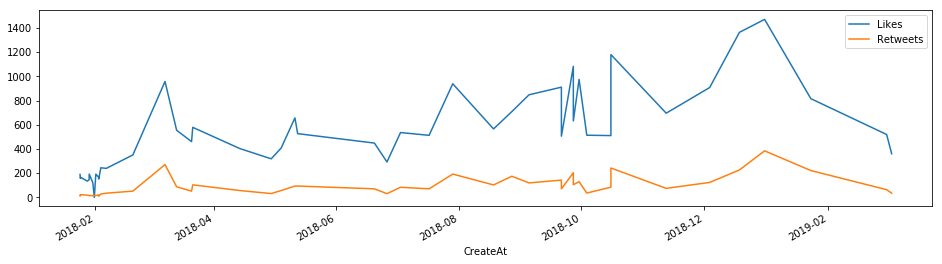

In [50]:
#Lets view a plot with the times and numbers os retweets and likes
fav = pd.Series(data=dataJoao['Likes'].values, index=dataJoao['CreateAt'])
ret = pd.Series(data=dataJoao['RTs'].values, index=dataJoao['CreateAt'])

#Ploting
fav.plot(figsize=(16,4), label="Likes", legend=True)
ret.plot(figsize=(16,4), label="Retweets", legend=True);

fig = plt.gcf()
fig.savefig('img/likes_vs_retweets.png')

In [51]:
# Now lets see the device used for tweeting
devices = []
for device in dataJoao['Source']:
    if device not in devices:
        devices.append(device)

# Printing in a loop:
print("Device's used for tweeting:")
for device in devices:
    print("* {}".format(device))

Device's used for tweeting:
* Instagram
* Twitter for Android
* Twitter Web Client
* Twitter Web App


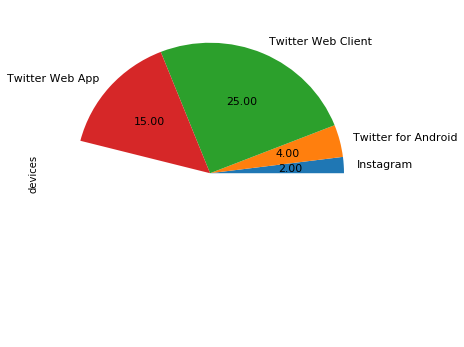

In [52]:
# Mapping
percent = np.zeros(len(devices))

for device in dataJoao['Source']:
    for index in range(len(devices)):
        if device == devices[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=devices, name='devices')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));
fig = plt.gcf()
fig.savefig('img/devices.png')

In [53]:
#Expoting the data to a csv file
dataJoao.to_csv('output/joao_lorenco_tweets_data.csv')